Step 1: Load the Data

Start by loading the provided CSV datasets (transactions, stores, users) into your environment.

In [1]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('transactions.csv')
stores = pd.read_csv('stores.csv')
users = pd.read_csv('users.csv')

Step 2: Exploratory Data Analysis (EDA)

Perform an EDA to identify patterns in the data. This might include:

	1.	Transaction Amounts Over Time:
	•	Plot the total GMV per month to see trends.
	•	Group transactions by month and visualize the total transaction amounts.

In [2]:
transactions.columns

Index(['id', 'user_id', 'store_id', 'event_occurrence', 'amount'], dtype='object')

In [3]:
users.columns

Index(['id', 'gender', 'age'], dtype='object')

In [4]:
stores.columns

Index(['id', 'nam', 'laa', 'category', 'lat', 'lon'], dtype='object')

In [5]:
# import matplotlib.font_manager as fm

# # List all available fonts
# fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# for font in fonts:
#     print(fm.FontProperties(fname=font).get_name())

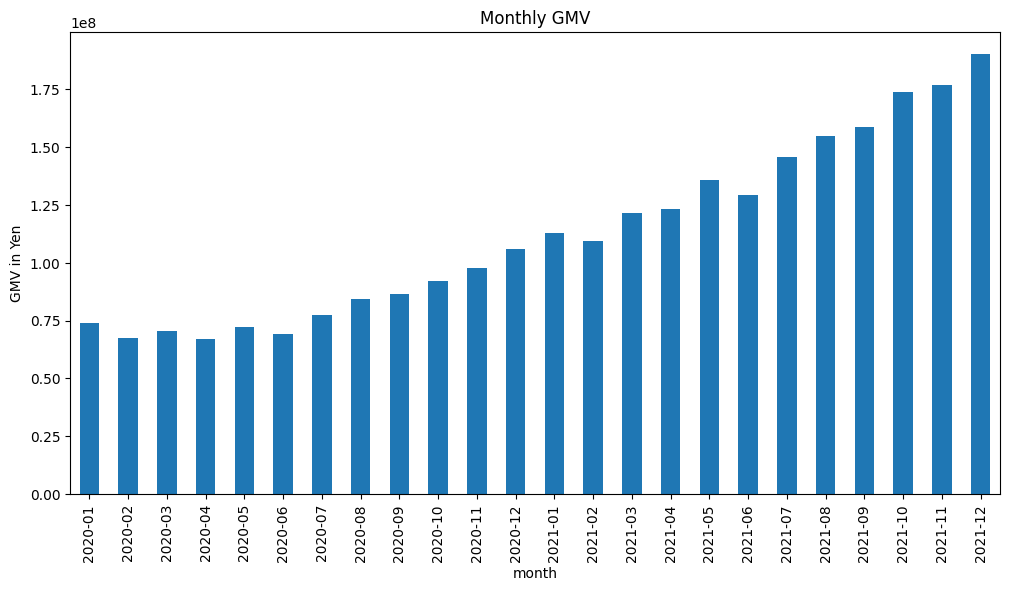

In [6]:
import matplotlib.pyplot as plt

transactions['event_occurrence'] = pd.to_datetime(transactions['event_occurrence'])
transactions['month'] = transactions['event_occurrence'].dt.to_period('M')

# Total GMV per month
monthly_gmv = transactions.groupby('month')['amount'].sum()

plt.figure(figsize=(12, 6))
monthly_gmv.plot(kind='bar')
plt.title('Monthly GMV')
plt.ylabel('GMV in Yen')
plt.show()

User Demographics

	1.	Analyze Age Distribution and Gender Ratio:

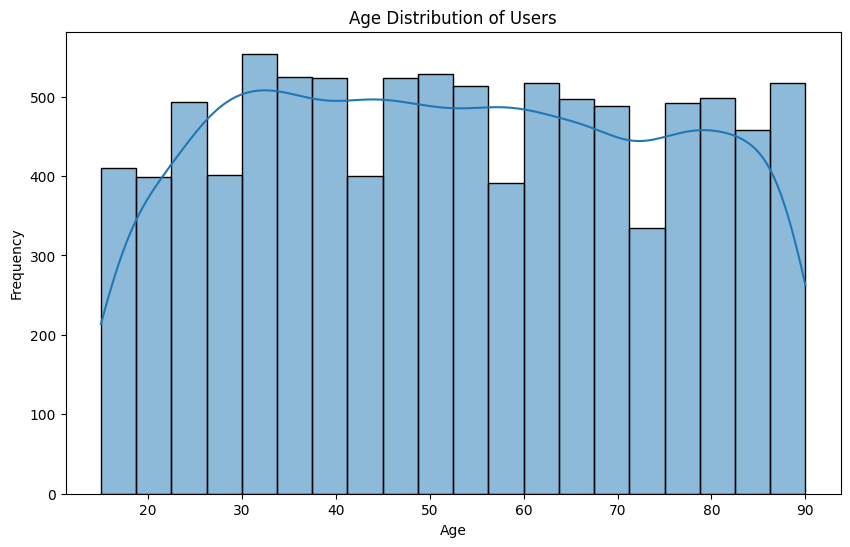

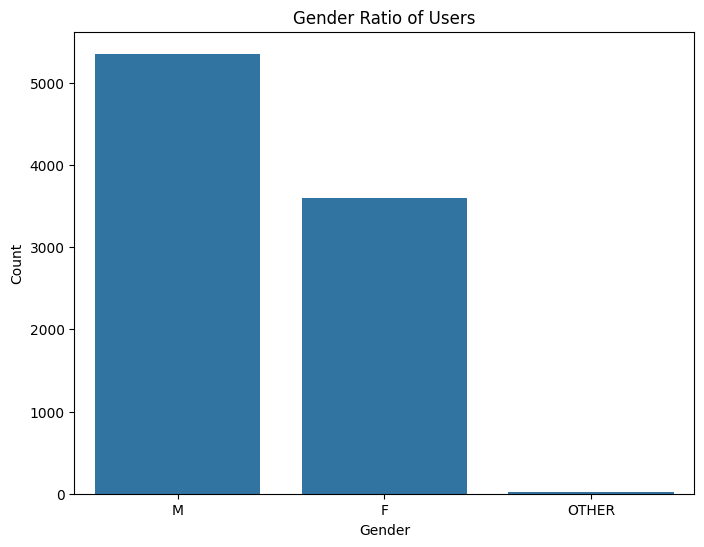

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load user data
users = pd.read_csv('users.csv')

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender ratio
plt.figure(figsize=(8, 6))
sns.countplot(data=users, x='gender')
plt.title('Gender Ratio of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

	2.	Visualize GMV per User Category (Age, Gender):

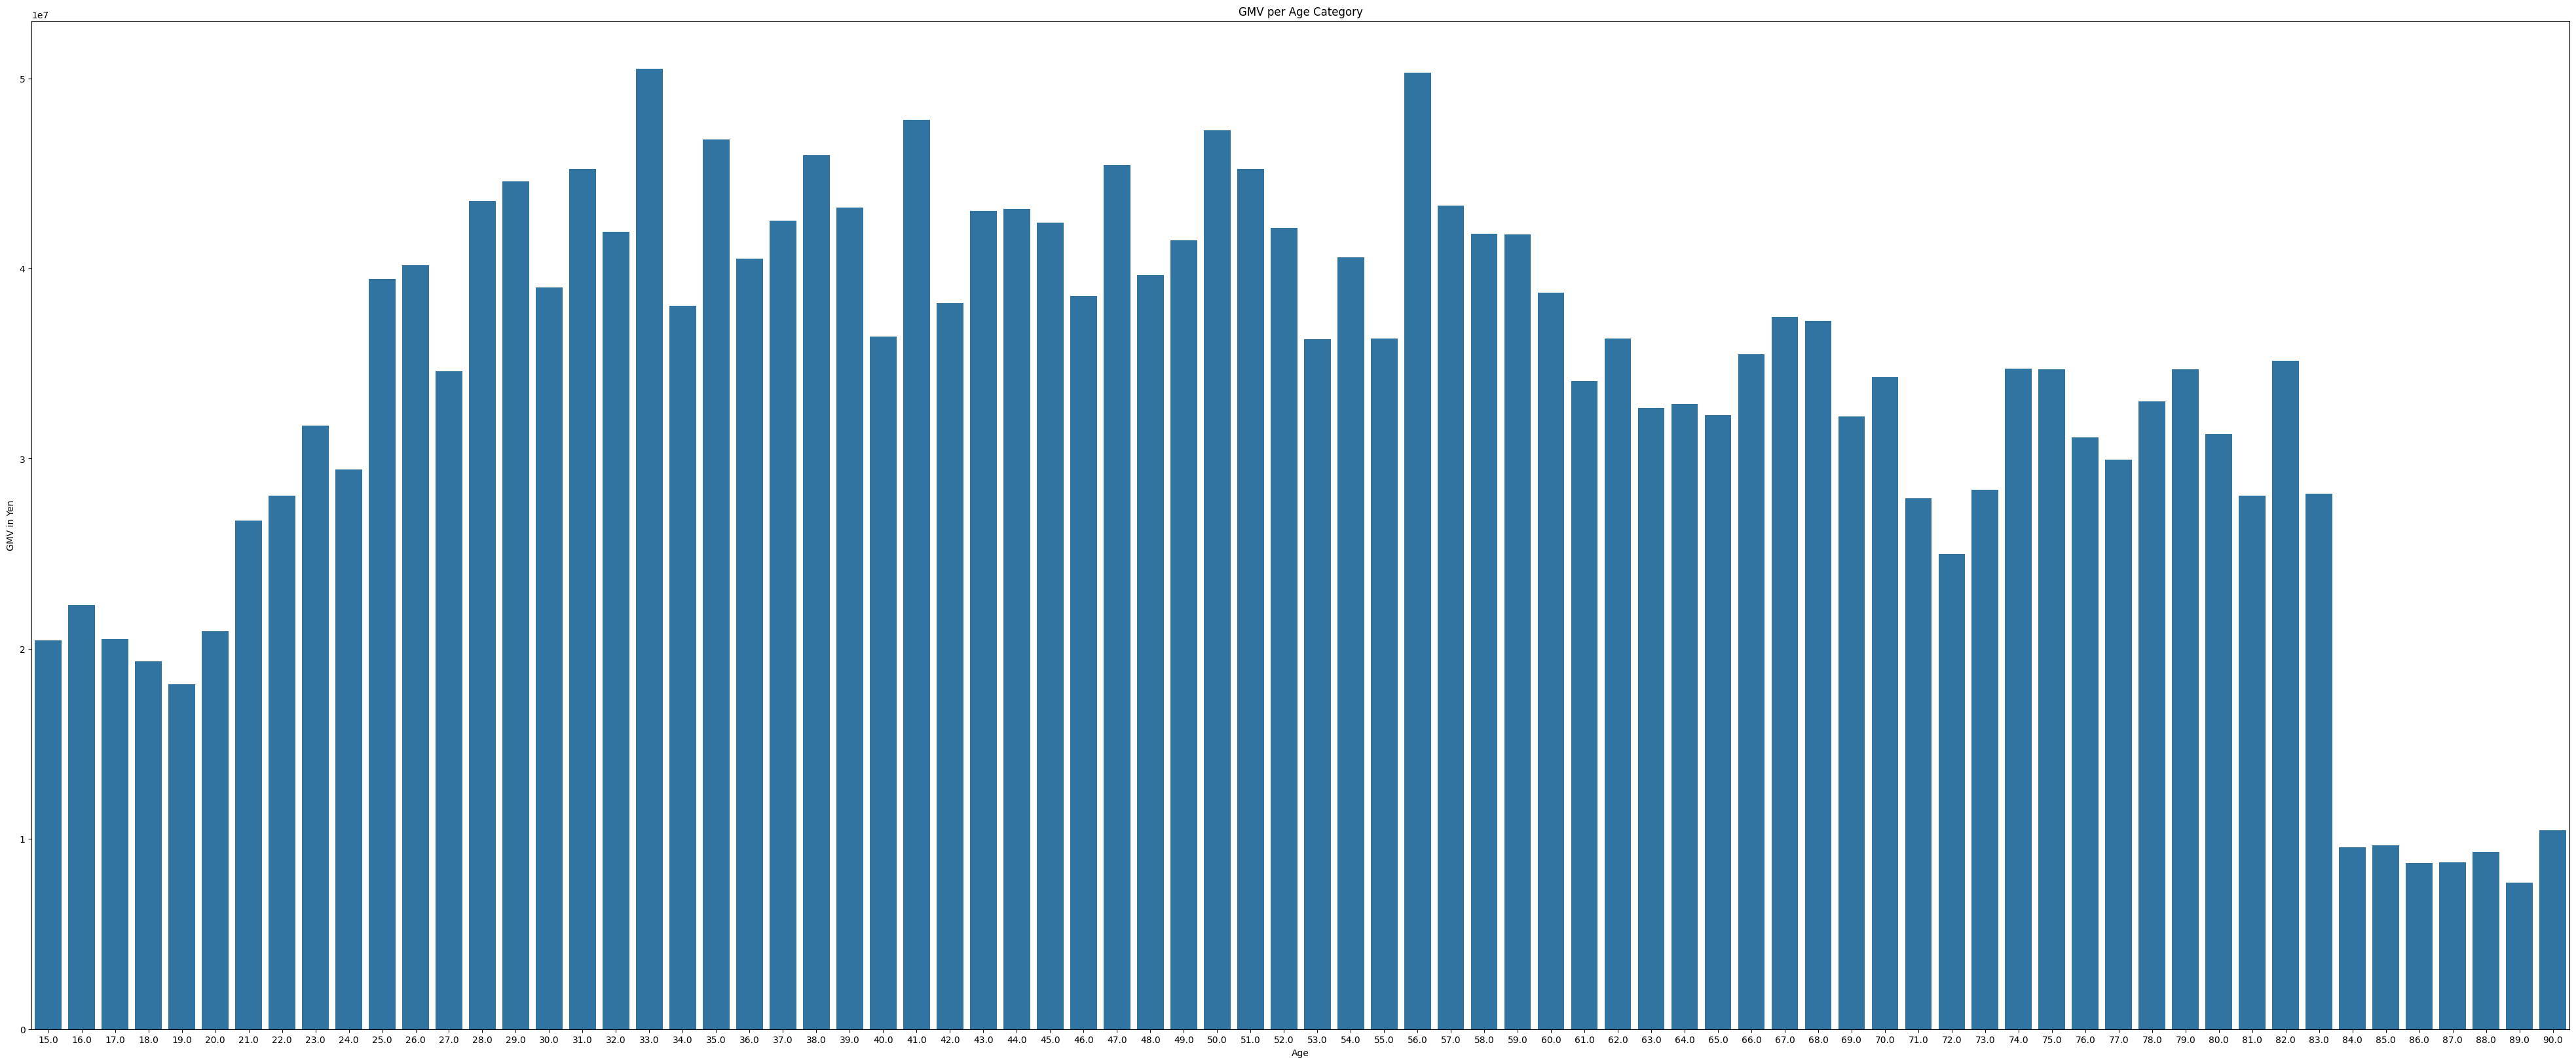

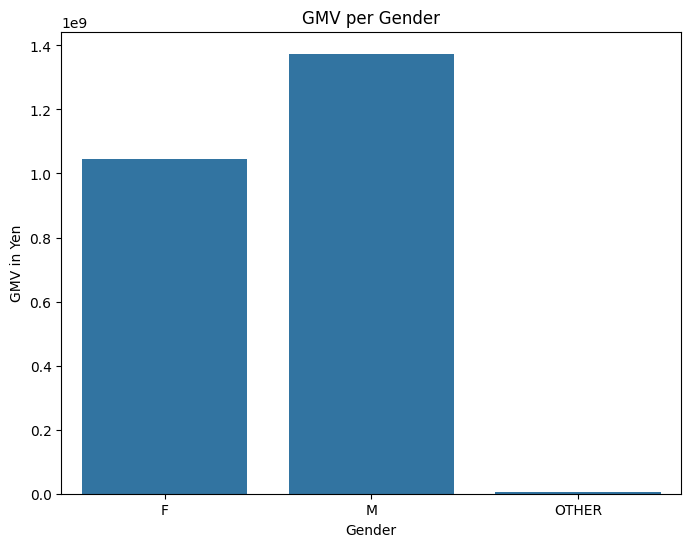

In [8]:
# Load transactions data
transactions = pd.read_csv('transactions.csv')

# Merge transactions with user data
user_transactions = transactions.merge(users, left_on='user_id', right_on='id')

# GMV per age category
plt.figure(figsize=(50, 20))
age_gmv = user_transactions.groupby('age')['amount'].sum().reset_index()
sns.barplot(x='age', y='amount', data=age_gmv)
plt.title('GMV per Age Category')
plt.xlabel('Age')
plt.ylabel('GMV in Yen')
plt.show()

# GMV per gender
plt.figure(figsize=(8, 6))
gender_gmv = user_transactions.groupby('gender')['amount'].sum().reset_index()
sns.barplot(x='gender', y='amount', data=gender_gmv)
plt.title('GMV per Gender')
plt.xlabel('Gender')
plt.ylabel('GMV in Yen')
plt.show()

Store Characteristics

	1.	Explore Store Categories, Locations, and GMV Contributions:

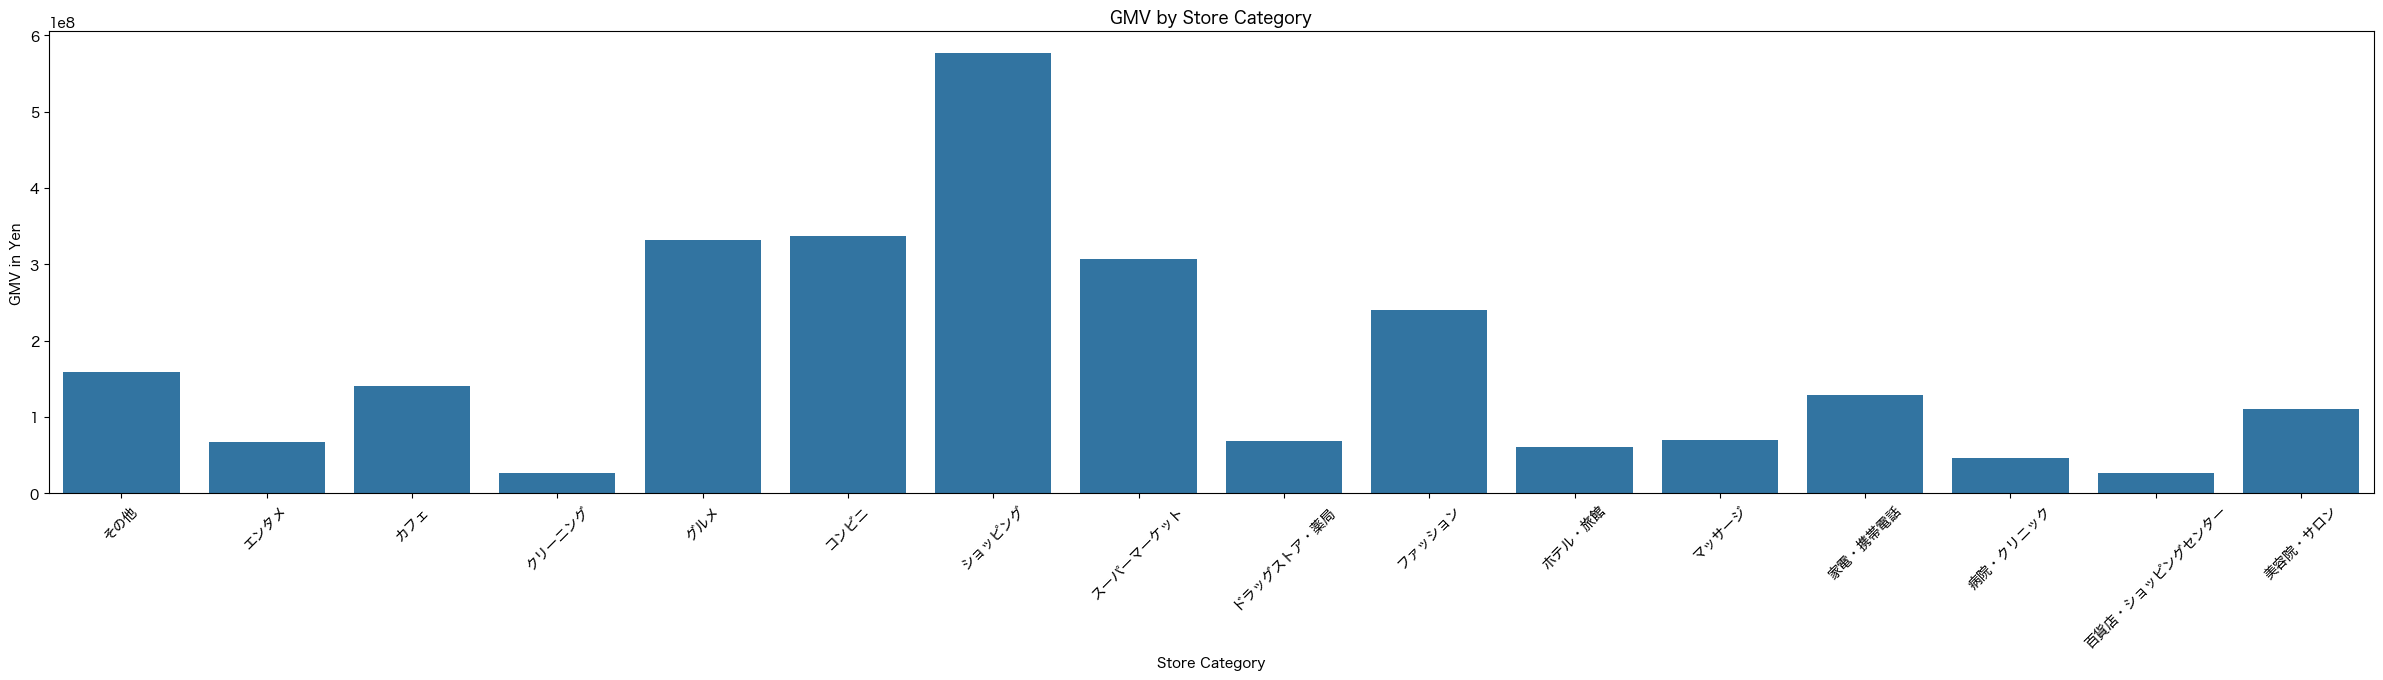

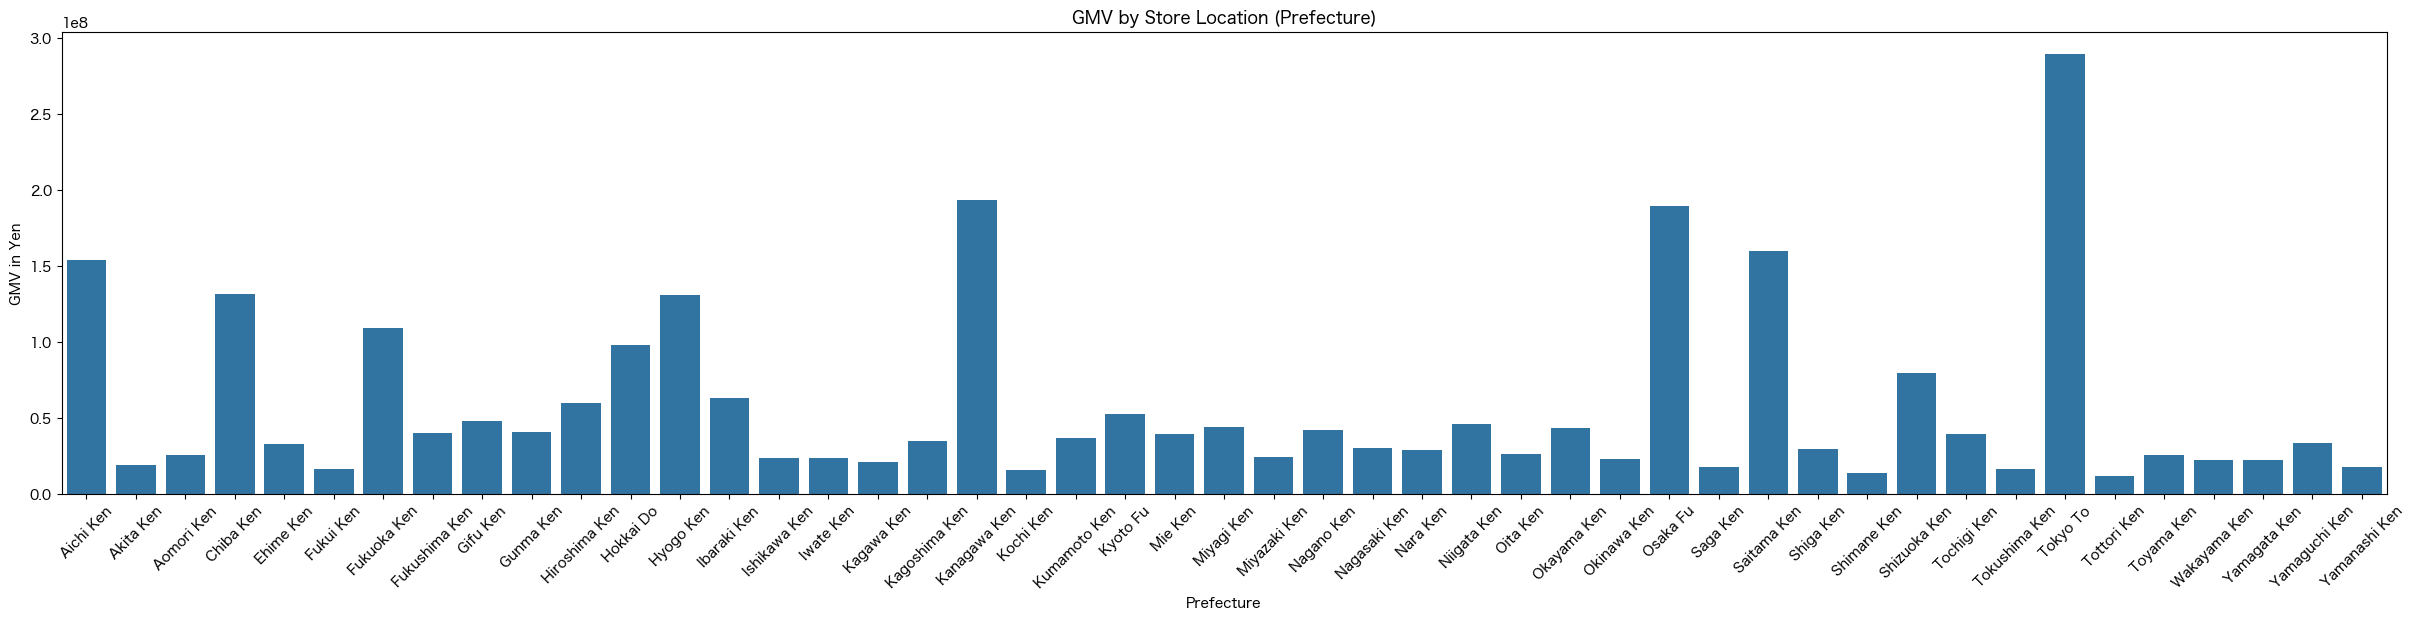

In [18]:
# Load store data
import matplotlib as mpl
import matplotlib
# Override the font-family which supports CJK characters
matplotlib.rcParams['font.family'] = 'Hiragino sans'

stores = pd.read_csv('stores.csv')

# Merge transactions with store data
store_transactions = transactions.merge(stores, left_on='store_id', right_on='id')

# GMV by store category
plt.figure(figsize=(30, 6))
category_gmv = store_transactions.groupby('category')['amount'].sum().reset_index()
sns.barplot(x='category', y='amount', data=category_gmv)
plt.title('GMV by Store Category')
plt.xlabel('Store Category')
plt.ylabel('GMV in Yen')
plt.xticks(rotation=45)
plt.show()

# GMV by store location (example: by prefecture)
plt.figure(figsize=(30, 6))
location_gmv = store_transactions.groupby('nam')['amount'].sum().reset_index()
sns.barplot(x='nam', y='amount', data=location_gmv)
plt.title('GMV by Store Location (Prefecture)')
plt.xlabel('Prefecture')
plt.ylabel('GMV in Yen')
plt.xticks(rotation=45)
plt.show()

Transaction Distribution

	1.	Check for Outliers and Patterns Across Different Time Frames:

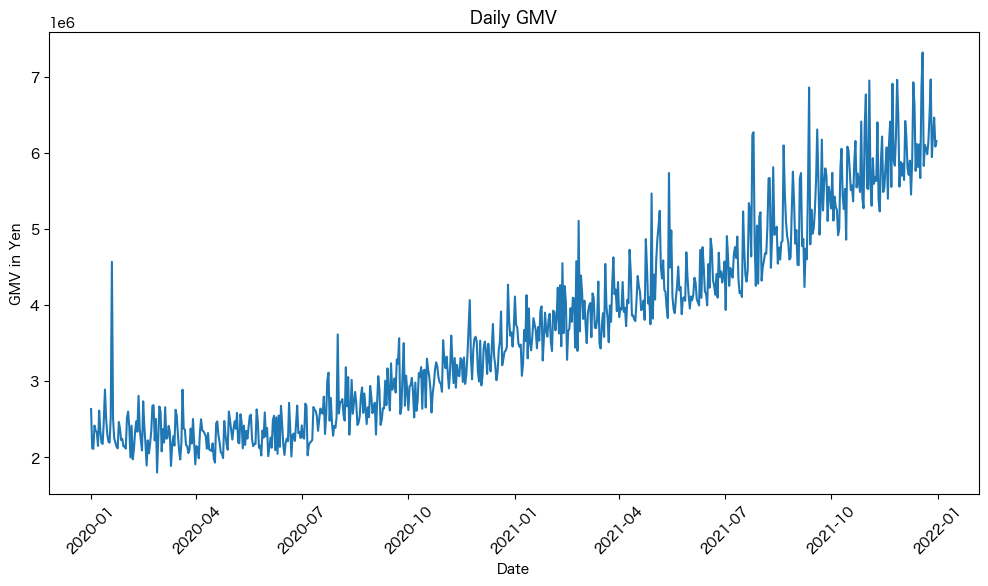

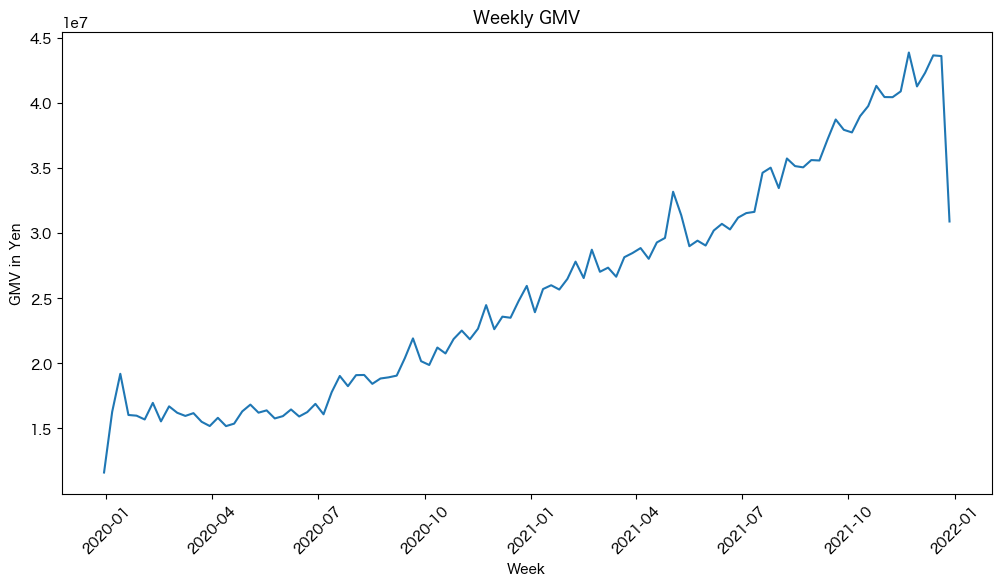

In [21]:
# Convert event_occurrence to datetime
transactions['event_occurrence'] = pd.to_datetime(transactions['event_occurrence'])

# Daily and weekly GMV
daily_gmv = transactions.groupby(transactions['event_occurrence'].dt.date)['amount'].sum().reset_index()
# Group by week and calculate weekly GMV
# Weekly GMV
weekly_gmv = transactions.groupby(transactions['event_occurrence'].dt.to_period('W').apply(lambda r: r.start_time))['amount'].sum().reset_index()
weekly_gmv.columns = ['event_occurrence', 'amount']  # Rename columns for consistency


plt.figure(figsize=(12, 6))
sns.lineplot(x='event_occurrence', y='amount', data=daily_gmv)
plt.title('Daily GMV')
plt.xlabel('Date')
plt.ylabel('GMV in Yen')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='event_occurrence', y='amount', data=weekly_gmv)
plt.title('Weekly GMV')
plt.xlabel('Week')
plt.ylabel('GMV in Yen')
plt.xticks(rotation=45)
plt.show()

	2.	Visualize Transaction Distribution Across Different Hours of the Day:

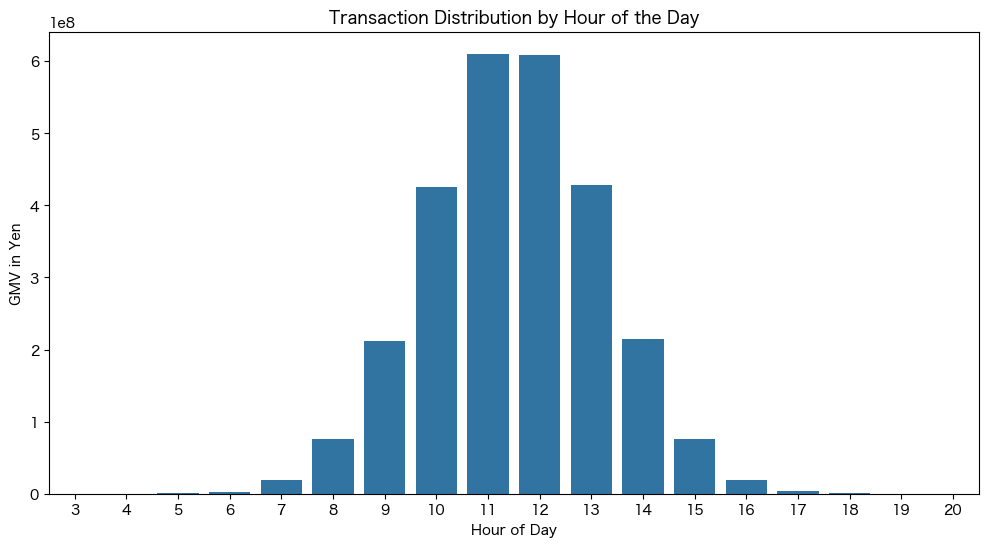

In [22]:
# Extract hour from event_occurrence
transactions['hour'] = transactions['event_occurrence'].dt.hour

plt.figure(figsize=(12, 6))
hourly_gmv = transactions.groupby('hour')['amount'].sum().reset_index()
sns.barplot(x='hour', y='amount', data=hourly_gmv)
plt.title('Transaction Distribution by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('GMV in Yen')
plt.show()

Step 3: Prepare Data for Forecasting

You will need to aggregate the data to the required granularity:

	1.	For User-Level Forecast:
	•	Aggregate the GMV per user per day for January 2022.

In [23]:
user_daily_gmv = transactions.groupby(['user_id', transactions['event_occurrence'].dt.date])['amount'].sum().reset_index()
user_daily_gmv = user_daily_gmv.rename(columns={'event_occurrence': 'date', 'amount': 'gmv'})

	2.	For Overall YayYay Forecast:
	•	Aggregate the GMV for the entire company for each date in January 2022.

In [24]:
daily_gmv = transactions.groupby(transactions['event_occurrence'].dt.date)['amount'].sum().reset_index()
daily_gmv = daily_gmv.rename(columns={'event_occurrence': 'date', 'amount': 'gmv'})

Step 4: Forecasting GMV

To forecast GMV, you can use time series forecasting models like ARIMA, Prophet, or machine learning models. Below is an example using Facebook’s Prophet library:
Forecast for Users:
	•	Train a separate model for each user and forecast their GMV for January 2022.

In [28]:
from prophet import Prophet

# Example: Forecast for YayYay
daily_gmv = transactions.groupby(transactions['event_occurrence'].dt.date)['amount'].sum().reset_index()
daily_gmv = daily_gmv.rename(columns={'event_occurrence': 'ds', 'amount': 'y'})

model = Prophet()
model.fit(daily_gmv)

future_dates = pd.DataFrame(pd.date_range(start='2022-01-01', end='2022-01-31'), columns=['ds'])
forecast_total = model.predict(future_dates)
forecast_total.to_csv('./output_data/yayyay_gmv_forecast.csv', index=False)

14:34:38 - cmdstanpy - INFO - Chain [1] start processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# 2. Forecast GMV for Each User for January 2022
user_forecasts = []

for user_id in transactions['user_id'].unique():
    user_data = transactions[transactions['user_id'] == user_id]
    daily_gmv = user_data.groupby(user_data['event_occurrence'].dt.date)['amount'].sum().reset_index()
    daily_gmv.columns = ['ds', 'y']  # Prophet expects columns 'ds' and 'y'

    model = Prophet()
    model.fit(daily_gmv)

    # Create future DataFrame for January 2022
    future_dates = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', end='2022-01-31')})
    forecast = model.predict(future_dates)

    forecast['user_id'] = user_id
    user_forecasts.append(forecast[['ds', 'yhat', 'user_id']])

user_forecast_df = pd.concat(user_forecasts)
user_forecast_df.to_csv('./output_data/user_gmv_forecast.csv', index=False)

14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing
14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing
14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing
14:36:09 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing
14:36:10 - cmdstanpy - INFO - Chain [1] start processing
14:36:10 - cmdstanpy - INFO - Chain [1] done processing
14:36:10 - cmdstanpy - INFO - Chain [1] start processing
14:36:10 - cmdstanpy - INFO - Chain [1] done processing
14:36:10 - cmdstanpy - INFO - Chain [1] start processing
14:36:10 - cmdstanpy - INFO - Chain [1] done processing
14:36:10 - cmdstanpy - INFO - Chain [1] start processing
14:36:10 - cmdstanpy - INFO - Chain [1] done processing
14:36:10 - cmdstanpy - INFO - Chain [1] start processing
14:36:11 - cmdstanpy - INFO - Chain [1]

ValueError: Dataframe has less than 2 non-NaN rows.

In [ ]:
# Optional: Visualize Forecasts for a Specific User (e.g., User 1)
user_1_forecast = user_forecast_df[user_forecast_df['user_id'] == 1]

plt.figure(figsize=(10, 6))
plt.plot(user_1_forecast['ds'], user_1_forecast['yhat'], label='Forecasted GMV')
plt.title('GMV Forecast for User 1')
plt.xlabel('Date')
plt.ylabel('Forecasted GMV in Yen')
plt.legend()
plt.xticks(rotation=45)
plt.show()

	3.	Forecast for YayYay as a Whole:
	•	Train a model on the aggregated daily GMV and forecast for January 2022.

In [27]:
overall_data = daily_gmv.rename(columns={'date': 'ds', 'gmv': 'y'})

model = Prophet()
model.fit(overall_data)

future_dates = pd.DataFrame(pd.date_range(start='2022-01-01', end='2022-01-31'), columns=['ds'])
forecast = model.predict(future_dates)

forecast.to_csv('./output_data/yayyay_gmv_forecast1.csv', index=False)

14:30:52 - cmdstanpy - INFO - Chain [1] start processing
14:30:52 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Optional: Visualize Total GMV Forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_total['ds'], forecast_total['yhat'], label='Forecasted GMV for YayYay')
plt.title('GMV Forecast for YayYay')
plt.xlabel('Date')
plt.ylabel('Forecasted GMV in Yen')
plt.legend()
plt.xticks(rotation=45)
plt.show()